In [23]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe

In [21]:
df = pd.read_csv("data/dataset1.csv")
df

,kartu,panggilan,blok,bonus
0,prabayar,sedikit,sedang,0
1,pascabayar,banyak,sedang,1
2,prabayar,banyak,sedang,1
3,prabayar,banyak,rendah,0
4,pascabayar,cukup,tinggi,1
5,pascabayar,cukup,sedang,1
6,prabayar,cukup,sedang,1
7,prabayar,cukup,rendah,0
8,pascabayar,sedikit,tinggi,1
9,pascabayar,banyak,tinggi,1


In [22]:
X = df.drop(columns="bonus")
y = df.bonus

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 3), (3, 3), (8,), (3,))

In [10]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), ['kartu', 'panggilan', 'blok']),
])

In [19]:
from sklearn.naive_bayes import GaussianNB
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', GaussianNB())
])

In [12]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['kartu', 'panggilan',
                                                   'blok'])])),
                ('algo', GaussianNB())])

In [13]:
pipeline.score(X_train, y_train)

1.0

In [14]:
pipeline.score(X_test, y_test)

0.6666666666666666

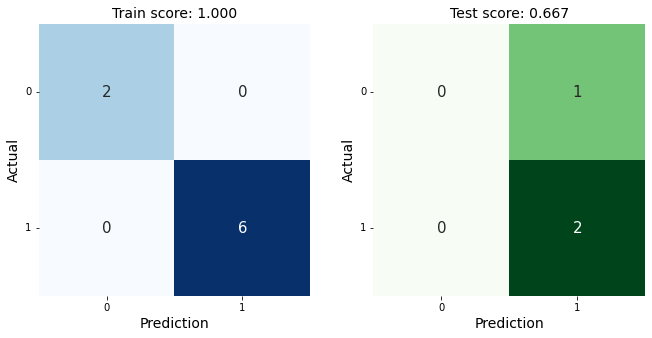

In [15]:
from jcopml.plot import plot_confusion_matrix
plot_confusion_matrix(X_train, y_train, X_test, y_test, pipeline)

# Prediction

In [16]:
X_pred = pd.read_csv("data/testing.csv")
X_pred

,kartu,panggilan,blok
0,pascabayar,cukup,rendah


In [17]:
pipeline.predict(X_pred)

array([1], dtype=int64)

In [18]:
X_pred["bonus"] = pipeline.predict(X_pred)
X_pred

,kartu,panggilan,blok,bonus
0,pascabayar,cukup,rendah,1
